# 深度卷积生成对抗网络（DCGAN）

## 一、前言

🔥本文 GitHub [https://github.com/kzbkzb/Python-AI](https://github.com/kzbkzb/Python-AI) 已收录

- 作者：[K同学啊](https://mp.weixin.qq.com/s/NES9RhtAhbX_jsmGua28dA)
- 来自专栏：《深度学习100例》-Tensorflow2版本
- 数据链接：https://pan.baidu.com/s/1ZSOidGKbly5yDkiODsmn6A （提取码：qt7h）

🚀我的环境：

- 语言环境：Python3.6.5
- 编译器：jupyter notebook
- 深度学习环境：TensorFlow2.4.1

🚀 **深度学习新人必看：[《小白入门深度学习》](https://blog.csdn.net/qq_38251616/category_11188161.html)**

1. [小白入门深度学习 | 第一篇：配置深度学习环境](https://mtyjkh.blog.csdn.net/article/details/118575238)
2. [小白入门深度学习 | 第二篇：编译器的使用-Jupyter Notebook](https://mtyjkh.blog.csdn.net/article/details/118814364)
3. [小白入门深度学习 | 第三篇：深度学习初体验](https://mtyjkh.blog.csdn.net/article/details/119081309)

🚀 往期精彩-卷积神经网络篇：

1. [深度学习100例-卷积神经网络（CNN）实现mnist手写数字识别 | 第1天](https://mtyjkh.blog.csdn.net/article/details/116920825) 
2. [深度学习100例-卷积神经网络（CNN）彩色图片分类 | 第2天](https://mtyjkh.blog.csdn.net/article/details/116978213)
3. [深度学习100例-卷积神经网络（CNN）服装图像分类 | 第3天](https://mtyjkh.blog.csdn.net/article/details/116992196)
4. [深度学习100例-卷积神经网络（CNN）花朵识别 | 第4天](https://mtyjkh.blog.csdn.net/article/details/117079919)
5. [深度学习100例-卷积神经网络（CNN）天气识别 | 第5天](https://mtyjkh.blog.csdn.net/article/details/117186183)
6. [深度学习100例-卷积神经网络（VGG-16）识别海贼王草帽一伙 | 第6天](https://mtyjkh.blog.csdn.net/article/details/117331631)
7. [深度学习100例-卷积神经网络（VGG-19）识别灵笼中的人物 | 第7天](https://mtyjkh.blog.csdn.net/article/details/117395797)
8. [深度学习100例-卷积神经网络（ResNet-50）鸟类识别 | 第8天](https://mtyjkh.blog.csdn.net/article/details/117587326)
9. [深度学习100例-卷积神经网络（AlexNet）手把手教学 | 第11天](https://mtyjkh.blog.csdn.net/article/details/117986183)
10. [深度学习100例-卷积神经网络（CNN）识别验证码 | 第12天](https://mtyjkh.blog.csdn.net/article/details/118211253)
11. [深度学习100例-卷积神经网络（Inception V3）识别手语 | 第13天](https://mtyjkh.blog.csdn.net/article/details/118310170)
12. [深度学习100例-卷积神经网络（Inception-ResNet-v2）识别交通标志 | 第14天](https://mtyjkh.blog.csdn.net/article/details/118389790)
13. [深度学习100例-卷积神经网络（CNN）实现车牌识别 | 第15天](https://mtyjkh.blog.csdn.net/article/details/118422302)
14. [深度学习100例-卷积神经网络（CNN）识别神奇宝贝小智一伙 | 第16天](https://mtyjkh.blog.csdn.net/article/details/118631541)
15. [深度学习100例-卷积神经网络（CNN）注意力检测 | 第17天](https://mtyjkh.blog.csdn.net/article/details/118938811)

🚀 往期精彩-循环神经网络篇：

1. [深度学习100例-循环神经网络（RNN）实现股票预测 | 第9天](https://mtyjkh.blog.csdn.net/article/details/117752046)
2. [深度学习100例-循环神经网络（LSTM）实现股票预测 | 第10天](https://mtyjkh.blog.csdn.net/article/details/117907074)

🚀 往期精彩-生成对抗网络篇：

1. [深度学习100例-生成对抗网络（GAN）手写数字生成 | 第18天](https://mtyjkh.blog.csdn.net/article/details/118995896)
2. [深度学习100例-生成对抗网络（DCGAN）手写数字生成 | 第19天](https://mtyjkh.blog.csdn.net/article/details/119133575)

## 二、什么是生成对抗网络？

生成对抗网络（GAN）是当今计算机科学领域最有趣的想法之一。两个模型通过对抗过程同时训练。一个生成器模型（“艺术家”）学习创造看起来真实的图像，而判别器模型（“艺术评论家”）学习区分真假图像。

GAN 的应用十分广泛，它的应用包括图像合成、风格迁移、照片修复以及照片编辑，数据增强等等，这次我将讲解如何用生成对抗网络生成小姐姐。

先看看我生成的小姐姐一睹为快

![](./pic_gif/MINST_DCGAN.gif)

### 1. 设置GPU

In [43]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")
    
# 打印显卡信息，确认GPU可用
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [44]:
from tensorflow.keras  import layers
from IPython           import display
import numpy             as np
import glob,imageio,os,PIL,time,pathlib

import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

### 2. 加载和准备数据集

您将使用 MNIST 数据集来训练生成器和判别器。生成器将生成类似于 MNIST 数据集的手写数字。

In [45]:
data_dir = "D:/jupyter notebook/DL-100-days/datasets/020_cartoon_face"
data_dir = pathlib.Path(data_dir)

pictures_paths = list(data_dir.glob('*'))
pictures_paths = [str(path) for path in pictures_paths]
pictures_paths[:3]

['D:\\jupyter notebook\\DL-100-days\\datasets\\020_cartoon_face\\1.png',
 'D:\\jupyter notebook\\DL-100-days\\datasets\\020_cartoon_face\\10.png',
 'D:\\jupyter notebook\\DL-100-days\\datasets\\020_cartoon_face\\100.png']

In [46]:
image_count = len(list(pictures_paths))

print("图片总数为：",image_count)

图片总数为： 21551


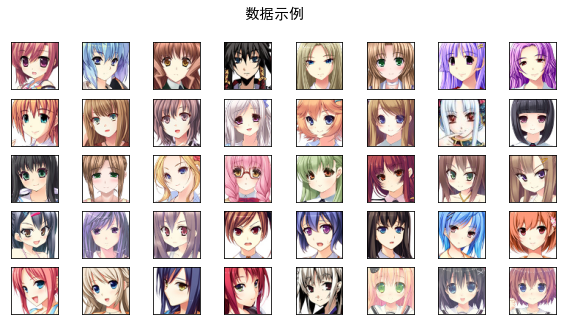

In [47]:
plt.figure(figsize=(10,5))
plt.suptitle("数据示例",fontsize=15)

for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    
    # 显示图片
    images = plt.imread(pictures_paths[i])
    plt.imshow(images)

# plt.show()

In [48]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [64, 64])
    return (image - 127.5) / 127.5

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

AUTOTUNE = tf.data.experimental.AUTOTUNE

path_ds  = tf.data.Dataset.from_tensor_slices(pictures_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [49]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

# 批量化和打乱数据
train_dataset = image_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## 三、创建模型

### 1. 生成器

生成器使用 `tf.keras.layers.Conv2DTranspose` （上采样）层来从种子（随机噪声）中产生图片。以一个使用该种子作为输入的 `Dense` 层开始，然后多次上采样直到达到所期望的 28x28x1 的图片尺寸。注意除了输出层使用 tanh 之外，其他每层均使用 `tf.keras.layers.LeakyReLU` 作为激活函数。

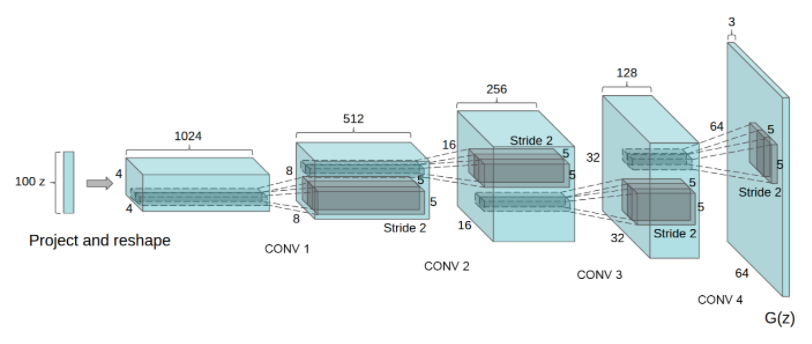

In [50]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(4*4*1024, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
        
    model.add(layers.Reshape((4, 4, 1024)))
    assert model.output_shape == (None, 4, 4, 1024)
        
    # 第一层
    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 512)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
        
    # 第二层
    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
        
    # 第三层
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
        
    # 第四层
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 64, 64, 3)

    return model

generator = make_generator_model()
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_8 (Batch (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16384)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 8, 8, 512)         13107200  
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 512)         2048      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 8, 8, 512)        

### 2. 判别器

判别器是一个基于 CNN 的图片分类器。

In [51]:
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Flatten(),
        layers.Dense(1)
    ])

    return model

discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)        

## 四、定义损失函数和优化器

为两个模型定义损失函数和优化器。

In [52]:
# 该方法返回计算交叉熵损失的辅助函数
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### 1. 判别器损失

该方法量化判断真伪图片的能力。它将判别器对真实图片的预测值与值全为 1 的数组进行对比，将判别器对伪造（生成的）图片的预测值与值全为 0 的数组进行对比。

In [53]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### 2. 生成器损失

生成器损失量化其欺骗判别器的能力。直观来讲，如果生成器表现良好，判别器将会把伪造图片判断为真实图片（或 1）。这里我们将把判别器在生成图片上的判断结果与一个值全为 1 的数组进行对比。

In [54]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

由于我们需要分别训练两个网络，判别器和生成器的优化器是不同的。

In [55]:
generator_optimizer     = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## 五、保存检查点

`tf.train.Checkpoint` 只保存模型的参数，不保存模型的计算过程，因此一般用于在具有模型源代码的时候恢复之前训练好的模型参数。

In [56]:
# 定义模型保存路径
checkpoint_dir = './model/model_20/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 六、定义训练循环


In [57]:
EPOCHS = 600
noise_dim = 100
num_examples_to_generate = 16

# 我们将重复使用该种子（在 GIF 中更容易可视化进度）
seed = tf.random.normal([num_examples_to_generate, noise_dim])

训练循环在生成器接收到一个随机种子作为输入时开始。该种子用于生产一张图片。判别器随后被用于区分真实图片（选自训练集）和伪造图片（由生成器生成）。针对这里的每一个模型都计算损失函数，并且计算梯度用于更新生成器与判别器。

In [58]:
# 注意 `tf.function` 的使用
# 该注解使函数被“编译”
@tf.function
def train_step(images):
    # 生成噪音
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        # 计算loss
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    
    #计算梯度
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    #更新模型
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [59]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # 实时更新生成的图片
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)
        
        # 每 15 个 epoch 保存一次模型
        if (epoch + 1) % 100 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # 最后一个 epoch 结束后生成图片
    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

**生成与保存图片**


In [64]:
def generate_and_save_images(model, epoch, test_input):
    # 注意 training` 设定为 False
    # 因此，所有层都在推理模式下运行（batchnorm）。
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(5,5))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i] * 0.5 + 0.5) # 注意需要还原标准化的图片
        plt.axis('off')

    plt.savefig('./images/images_20/image_at_epoch_{:04d}.png'.format(epoch+600))
    plt.show()

## 七、训练模型
调用上面定义的 `train()` 方法来同时训练生成器和判别器。在训练之初，生成的图片看起来像是随机噪声。随着训练过程的进行，生成的数字将越来越真实。在大概 50 个 epoch 之后，这些图片看起来像是 MNIST 数字。

`%%time`：将会给出cell的代码运行一次所花费的时间。

### 1. 恢复模型参数

返回目录下最近一次checkpoint的文件名。例如如果save目录下有 `model.ckpt-1.index` 到 `model.ckpt-10.index` 的10个保存文件， `tf.train.latest_checkpoint('./save')` 即返回 `./save/model.ckpt-10` 。

In [65]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

### 2. 训练模型

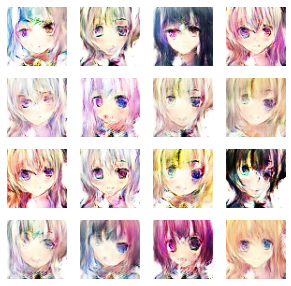

Time for epoch 201 is 17.364601135253906 sec


KeyboardInterrupt: 

In [66]:
%%time
train(train_dataset, EPOCHS)

### 3. 创建 GIF

In [63]:
import imageio,pathlib

def compose_gif():
    # 图片地址
    data_dir = "./images/images_20"
    data_dir = pathlib.Path(data_dir)
    paths    = list(data_dir.glob('*'))
    
    gif_images = []
    for path in paths:
        gif_images.append(imageio.imread(path))
    imageio.mimsave("MINST_DCGAN_20.gif",gif_images,fps=8)
    
compose_gif()
print("GIF动图生成完成！")

GIF动图生成完成！


**未完～**

**持续更新 欢迎 点赞👍、收藏⭐、关注👀**

- 点赞👍：点赞给我持续更新的动力
- 收藏⭐️：收藏后你能够随时找到文章
- 关注👀：关注我第一时间接收最新文章